# 最简单的神经网络

通过简单示例，初步对神经网络有感性认识。

未使用 cuda，使用 cpu。

## 线性回归模型的神经网络训练和预测

### 精简的代码示例

简单的线性回归模型，模拟了：

- 创建神经网络
- 训练生成模型，包括
    - 前向传播
    - 反向传播
- 模型的保存
- 加载模型
- 通过模型推理

通过这个示例，可以初步理解神经网络的 2 个过程（训练和推理），以及各个过程内部的基本操作。


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 生成一些示例数据
np.random.seed(42)
X = np.random.rand(100, 1)
y = (3 * X + 2 + 0.1 * np.random.randn(100, 1)).astype(np.float32)

# 转换数据为PyTorch张量
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

# 定义一个简单的神经网络模型
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(1, 1)  # 输入1维，输出1维

    def forward(self, x):
        return self.fc(x)

# 创建模型实例
model = SimpleModel()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print('开始训练..')
# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_tensor.to(torch.float32))
    loss = criterion(outputs, y_tensor.to(torch.float32))

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
print('训练完成')
print()
      
# 保存模型
model_path='1.simple-1.model'
torch.save(model.state_dict(), model_path)

# 加载模型进行预测
loaded_model = SimpleModel()
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()

# 准备要进行预测的数据
param=0.6
new_data = np.array([[param]], dtype=np.float32)
new_data_tensor = torch.from_numpy(new_data)

# 使用加载的模型进行预测
predicted = loaded_model(new_data_tensor)

print('开始预测..')
print(f'预测结果：{predicted.item()}')
print(f'真实值：{3*param+2}')

开始训练..
Epoch [100/1000], Loss: 0.2192
Epoch [200/1000], Loss: 0.1108
Epoch [300/1000], Loss: 0.0851
Epoch [400/1000], Loss: 0.0661
Epoch [500/1000], Loss: 0.0518
Epoch [600/1000], Loss: 0.0410
Epoch [700/1000], Loss: 0.0329
Epoch [800/1000], Loss: 0.0267
Epoch [900/1000], Loss: 0.0221
Epoch [1000/1000], Loss: 0.0187
训练完成

开始预测..
预测结果：3.7615089416503906
真实值：3.8


### 带图的示例

和上面示例类似，输出用matplotlib生成图形，看起来更直观。



Epoch [10/100], Loss: 0.0322
Epoch [20/100], Loss: 0.0216
Epoch [30/100], Loss: 0.0157
Epoch [40/100], Loss: 0.0124
Epoch [50/100], Loss: 0.0105
Epoch [60/100], Loss: 0.0094
Epoch [70/100], Loss: 0.0088
Epoch [80/100], Loss: 0.0085
Epoch [90/100], Loss: 0.0083
Epoch [100/100], Loss: 0.0082
Test: 0.7948
Prediction: 2.5636
Real: 2.5896
Using device: cuda


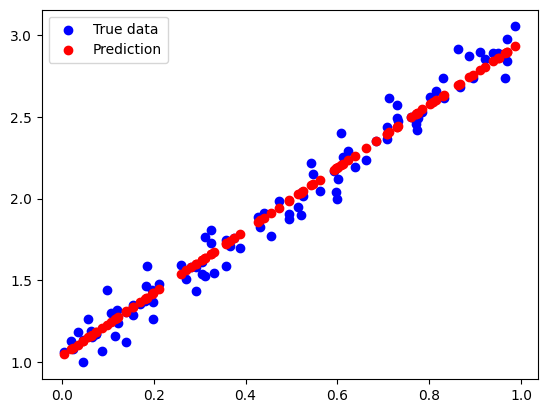

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

'''
创建一个简单的线性回归模型来进行训练和推理.

先生成了一些随机的训练数据，然后将数据转换为 PyTorch 张量。
接下来，我们定义了一个线性回归模型，并创建了一个模型实例。
我们还定义了损失函数和优化器，然后进行了训练。
最后，我们使用训练好的模型进行了预测，并可视化结果输出为图片。
'''

# # 用于强制使用 cpu 时
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]=""

# 生成训练数据
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + 0.1 * np.random.randn(100, 1)
# 将 NumPy 数组转换为 PyTorch 张量
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()


# 定义线性回归模型
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


# 创建模型实例
model = LinearRegression()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.2)

# 训练模型
num_epochs = 100
for epoch in range(num_epochs):
    # 前向传播
    output = model(x_tensor)
    loss = criterion(output, y_tensor)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
# 预测
model.eval() # 设置为评估模式
with torch.no_grad():
    x_test = np.random.rand(1, 1)
    y_pred = model(torch.from_numpy(x_test).float())
    print(f'Test: {x_test.item():.4f}')
    print(f'Prediction: {y_pred.item():.4f}')
    print(f'Real: {(x_test.item()*2+1):.4f}')

# 可视化结果保存为图片
plt.scatter(x, y, color='blue', label='True data')
plt.scatter(x, model(x_tensor).detach().numpy(),
            color='red', label='Prediction')
plt.legend()
plt.savefig('lrm.out.png')

# 使用哪种类型计算设备，cpu | cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

## 预测异或门逻辑的神经网络

这个示例可用来对比app 开发（通过程序）和通过神经网络的不同：

- 程序是线性的，需要通过逻辑判断输入，并给出确定的输出，本质上是各种 `if .. else`
- 神经网络是训练出模型，通过模型实现端到端的的应用（不必写中间的逻辑，由模型替代）



In [16]:
import numpy as np

# 生成示例数据 - 异或关系
np.random.seed(0)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # 输入数据
y = np.array([[0], [1], [1], [0]])  # 对应的标签（0或1）

# 定义神经网络的结构
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.01

# 初始化权重参数
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# 定义激活函数（sigmoid）
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 定义损失函数（均方误差）
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# 训练神经网络
num_epochs = 100000
for epoch in range(num_epochs):
    # 前向传播
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    # 计算损失
    loss = mse_loss(y, output_layer_output)

    # 反向传播
    d_loss = 2 * (output_layer_output - y)
    d_output = d_loss * output_layer_output * (1 - output_layer_output)
    d_hidden = np.dot(d_output, weights_hidden_output.T) * \
        hidden_layer_output * (1 - hidden_layer_output)

    # 更新权重参数
    weights_hidden_output -= learning_rate * \
        np.dot(hidden_layer_output.T, d_output)
    weights_input_hidden -= learning_rate * np.dot(X.T, d_hidden)

    if epoch % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

model_path="simple_nn_model.npz"
# 保存模型参数
np.savez(model_path, weights_input_hidden, weights_hidden_output)

# 加载模型参数
loaded_model = np.load(model_path)
weights_input_hidden_loaded = loaded_model['arr_0']
weights_hidden_output_loaded = loaded_model['arr_1']

# 定义一个函数来预测
def predict(input_data):
    hidden_layer_input = np.dot(input_data, weights_input_hidden_loaded)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(
        hidden_layer_output, weights_hidden_output_loaded)
    output_layer_output = sigmoid(output_layer_input)
    return output_layer_output


# 使用模型进行预测
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = predict(input_data)
print("预测结果：")
for i in range(len(input_data)):
    print(f"输入：{input_data[i]}, 预测：{predictions[i][0]:.0f}")



Epoch [1/100000], Loss: 0.3632
Epoch [1001/100000], Loss: 0.2504
Epoch [2001/100000], Loss: 0.2503
Epoch [3001/100000], Loss: 0.2502
Epoch [4001/100000], Loss: 0.2501
Epoch [5001/100000], Loss: 0.2500
Epoch [6001/100000], Loss: 0.2499
Epoch [7001/100000], Loss: 0.2499
Epoch [8001/100000], Loss: 0.2498
Epoch [9001/100000], Loss: 0.2497
Epoch [10001/100000], Loss: 0.2496
Epoch [11001/100000], Loss: 0.2494
Epoch [12001/100000], Loss: 0.2492
Epoch [13001/100000], Loss: 0.2488
Epoch [14001/100000], Loss: 0.2483
Epoch [15001/100000], Loss: 0.2473
Epoch [16001/100000], Loss: 0.2456
Epoch [17001/100000], Loss: 0.2426
Epoch [18001/100000], Loss: 0.2376
Epoch [19001/100000], Loss: 0.2300
Epoch [20001/100000], Loss: 0.2200
Epoch [21001/100000], Loss: 0.2083
Epoch [22001/100000], Loss: 0.1960
Epoch [23001/100000], Loss: 0.1838
Epoch [24001/100000], Loss: 0.1720
Epoch [25001/100000], Loss: 0.1608
Epoch [26001/100000], Loss: 0.1499
Epoch [27001/100000], Loss: 0.1391
Epoch [28001/100000], Loss: 0.128